In [3]:
# categories a set of data points to a discrete class based on a linear combination of its explanatory variables
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

The above generates 2 sets of data points. `negative_samples` and `positive samples` are data points that follow a bivariate normal distribution, where mean and variance are passed as model parameters. Covariance is set to 1 as we are constructing sample data that has a linear relationship. 

[[Var(X), Cov(X, Y)],
 [Cov(Y, X), Var(Y)]]

 Is the form of the covariance matrix being passed. Same applies for higher dimensions. 

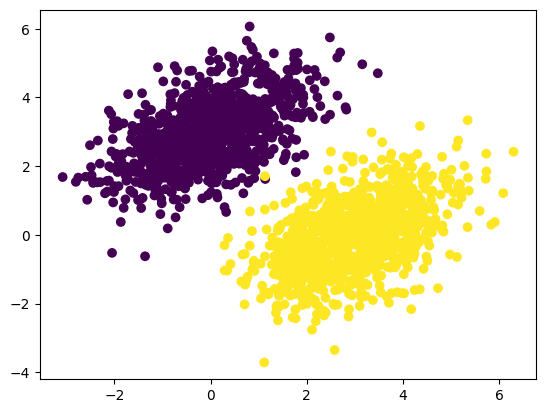

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) 

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show() # shows targets 

Above is plot of the data set after stacking them together.

In [5]:

# weights 
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b 

The above creates model weights. `inputs` is a 2000x2 tensor. As we are building a classification model, we want the output tensor to be 2000x1. So, we need `W` to be a 2x1 tensor. `b` is a scalar (broadcasted to element-wise).

In [6]:
# loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) 
  return tf.reduce_mean(per_sample_losses) 

The above is the loss function. `square_loss` function is a standard loss function. We perform element-wise squaring on the differecne. This way, errors become "amplified", and we remove negatives (as we don't really care about negatives, only that it has a loss value). We then get the mean over all values in the tensor and return it.

In [7]:
# training step function 
learning_rate = 0.1

def training_step(inputs, targets): 
  with tf.GradientTape() as tape: 
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # find gradient for both W and b, for both tensors 
  W.assign_sub(grad_loss_wrt_W * learning_rate) # we take that direction, multiply by learning rate, and minus it from the tensor, this updates the weights of this layer 
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

This is the training step. Gradient of the model function is computed, to training step, move `W` and `b` in the opposite direction of the gradient (as gradient direction is that of largest increase/incline) with respect to the learning rate. Finally, to evaluate effectiveness of this model:

Loss at step 0: 2.3007
Loss at step 1: 0.2046
Loss at step 2: 0.1175
Loss at step 3: 0.1012
Loss at step 4: 0.0935
Loss at step 5: 0.0874
Loss at step 6: 0.0819
Loss at step 7: 0.0769
Loss at step 8: 0.0724
Loss at step 9: 0.0682
Loss at step 10: 0.0644
Loss at step 11: 0.0610
Loss at step 12: 0.0578
Loss at step 13: 0.0549
Loss at step 14: 0.0523
Loss at step 15: 0.0499
Loss at step 16: 0.0477
Loss at step 17: 0.0457
Loss at step 18: 0.0439
Loss at step 19: 0.0422
Loss at step 20: 0.0407
Loss at step 21: 0.0393
Loss at step 22: 0.0381
Loss at step 23: 0.0369
Loss at step 24: 0.0359
Loss at step 25: 0.0349
Loss at step 26: 0.0341
Loss at step 27: 0.0333
Loss at step 28: 0.0325
Loss at step 29: 0.0319
Loss at step 30: 0.0313
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0298
Loss at step 34: 0.0293
Loss at step 35: 0.0290
Loss at step 36: 0.0286
Loss at step 37: 0.0283
Loss at step 38: 0.0280
Loss at step 39: 0.0277


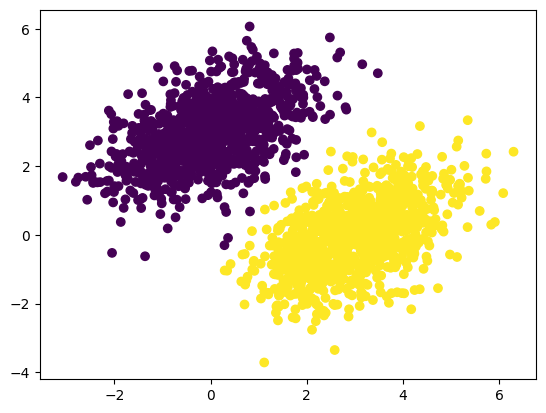

In [8]:

for step in range(40):
  loss = training_step(inputs, targets) 
  print(f"Loss at step {step}: {loss:.4f}") # this shows us the loss for 40 iteratons. We can see it slows down to around 0.027
  
# preidctions (naive way)
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # points are "0" if prediction value is below 0.5 and "1" if its above 0.5
plt.show()
